In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
%matplotlib inline

In [2]:
import missingno # library used to visualize missing values
import seaborn as sns
import plotly
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

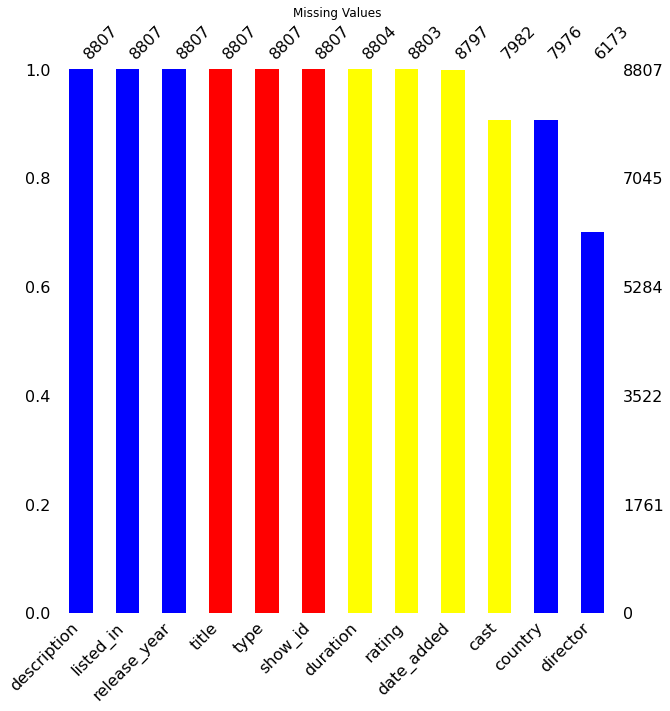

In [9]:
colors = ['Blue','Blue','Blue','Red','Red','Red','yellow','yellow','yellow','yellow','Blue','Blue',]
missingno.bar(df, figsize = (10,10), fontsize= 16, color = colors, sort = 'descending')
plt.title("Missing Values")
plt.show()

In [10]:
df['director'] = df['director'].fillna('NoAvailableData') 
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoAvailableDate')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [11]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoAvailableDate,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NoAvailableData,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NoAvailableData,NoAvailableDate,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NoAvailableData,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NoAvailableData,NoAvailableDate,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
df.duplicated().sum()

0

In [13]:
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month
df['year'].dtype

dtype('int64')

In [14]:
ratings_ages= {
    'TV-PG': 'Child',
    'TV-MA': 'Adult',
    'TV-Y7-FV': 'Child',
    'TV-Y7': 'Child',
    'TV-14': 'Adolesent',
    'R': 'Adolecent',
    'TV-Y': 'Infant',
    'NR': 'Adult',
    'PG-13': 'Teen',
    'TV-G': 'Infant',
    'PG': 'Child',
    'G': 'Infant',
    'UR': 'Adult',
    'NC-17': 'Adult'}
df["rating_ages"] = df['rating'].replace(ratings_ages)
df['rating_ages']

0            Teen
1           Adult
2           Adult
3           Adult
4           Adult
          ...    
8802    Adolecent
8803        Child
8804    Adolecent
8805        Child
8806    Adolesent
Name: rating_ages, Length: 8807, dtype: object

In [15]:
x = df['type'].value_counts().reset_index()
px.pie(x, values='type', names='index')

In [17]:
countryContent = df.groupby(['type'])['country'].value_counts().head(10)
countryContent = countryContent.to_frame(name = 'Country Content')
countryContent

Country Content
type  country                        
Movie United States              2498
      India                       893
      United Kingdom              206
      Canada                      122
      Spain                        97
      Egypt                        92
      Nigeria                      86
      Indonesia                    77
      Japan                        76
      Turkey                       76

<AxesSubplot:title={'center':'Countries with the highest number of movies and shows'}, xlabel='country', ylabel='type'>

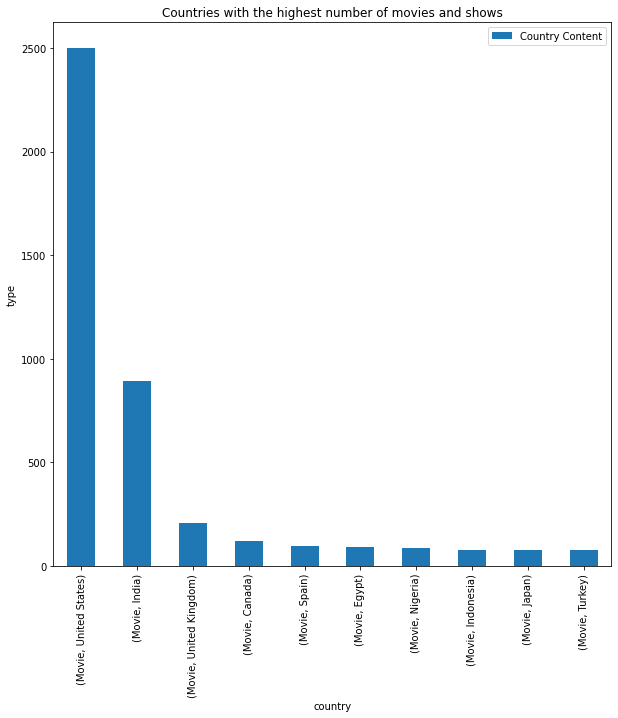

In [18]:
countryContent.plot(figsize = (10,10),kind = 'bar', xlabel = 'country', ylabel = 'type', title = 'Countries with the highest number of movies and shows' )

In [19]:
countryTab = pd.crosstab(df['country'],['type']).sort_values(by = 'type', ascending = True)[-10:].reset_index()
countryTab

col_0,country,type
0,Egypt,106
1,Mexico,110
2,France,124
3,Spain,145
4,Canada,181
5,South Korea,199
6,Japan,245
7,United Kingdom,419
8,India,972
9,United States,3649


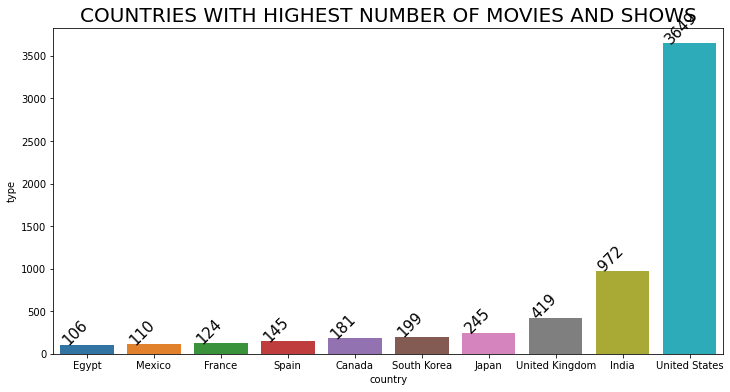

In [20]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=countries["country"],y=countries["type"] )
plt.title("COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS",fontsize=20)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(),str(int((i.get_height()))),rotation=45, fontsize=15, color='black')

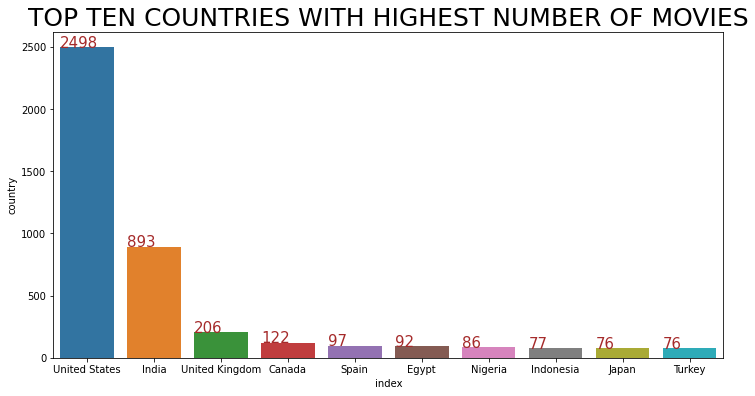

In [21]:
movie=df[df["type"]=="Movie"]
movies=movie["country"].value_counts().reset_index()[0:10]
movies = movies.sort_values(by= 'country', ascending = False)
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=25)
ax=sns.barplot(x="index",y="country", data = movies)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), str(int(i.get_height())), rotation= 0, fontsize=15 , color = 'brown')

In [22]:
movies

,index,country
0,United States,2498
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Japan,76
9,Turkey,76


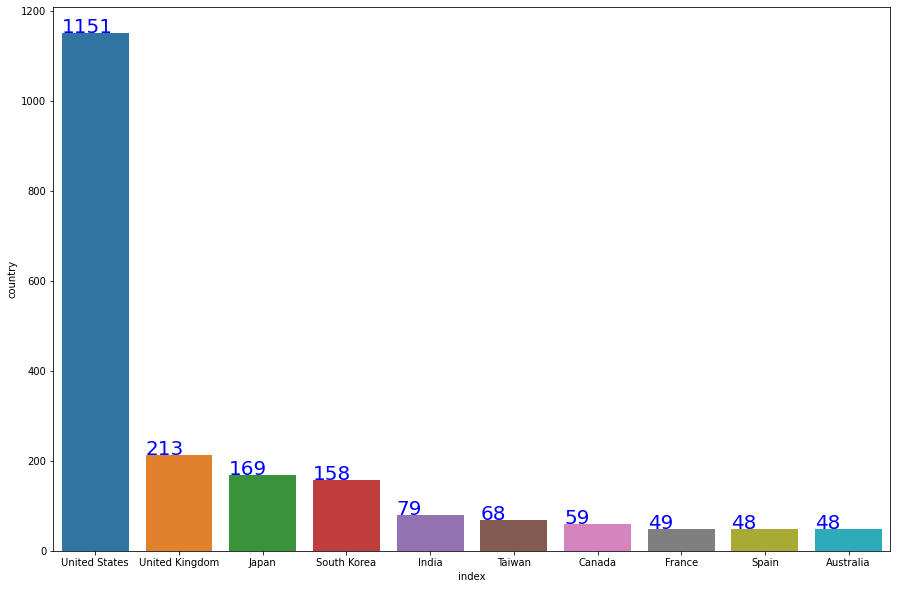

In [23]:
tv = df[df['type']=='TV Show']
television = tv['country'].value_counts().head(10).reset_index()
television
plt.figure(figsize=(15,10))
av = sns.barplot(x=television['index'], y=television['country'])

for i in av.patches:
    av.text(i.get_x(),i.get_height(),str(int(i.get_height())), rotation=0, color = 'Blue', fontsize = 20)

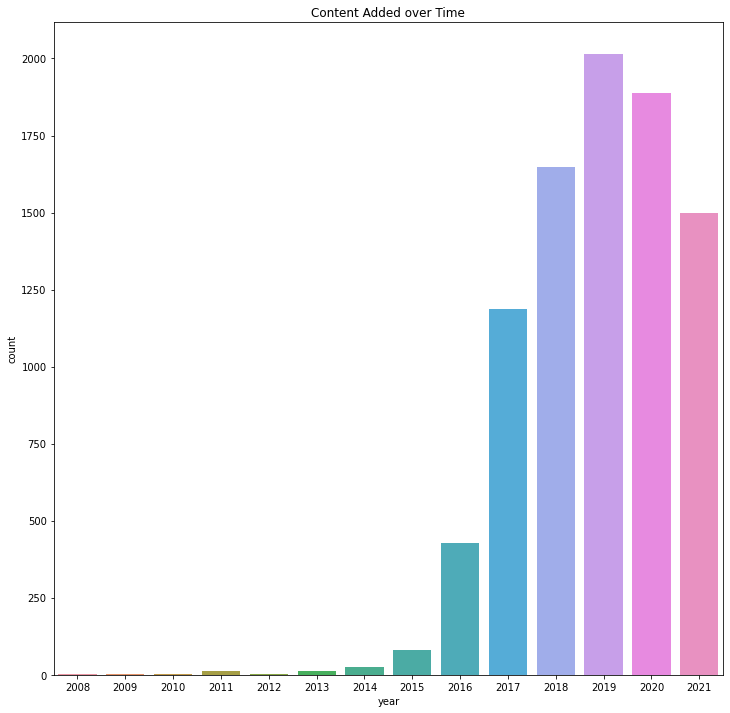

In [24]:
contentYear = df['year'].count()
plt.figure(figsize=(12,12))
sns.countplot(df['year'])
plt.title('Content Added over Time')
plt.show()

In [25]:
nineteen = df['year'][df['year']== 2019].count().sum()
twenty = df['year'][df['year']== 2020].count().sum()
content_percent = (((twenty/nineteen)*100) -100)
round(content_percent)

-6

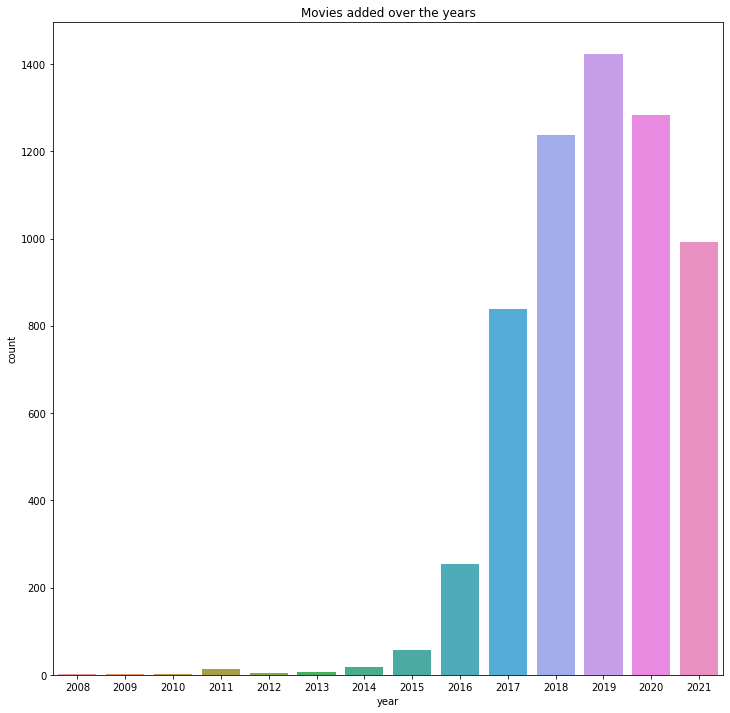

In [26]:
movieContent = df[df['type'] == 'Movie']
plt.figure(figsize = (12,12))
a = sns.countplot(movieContent['year'])
plt.title('Movies added over the years')
plt.show()

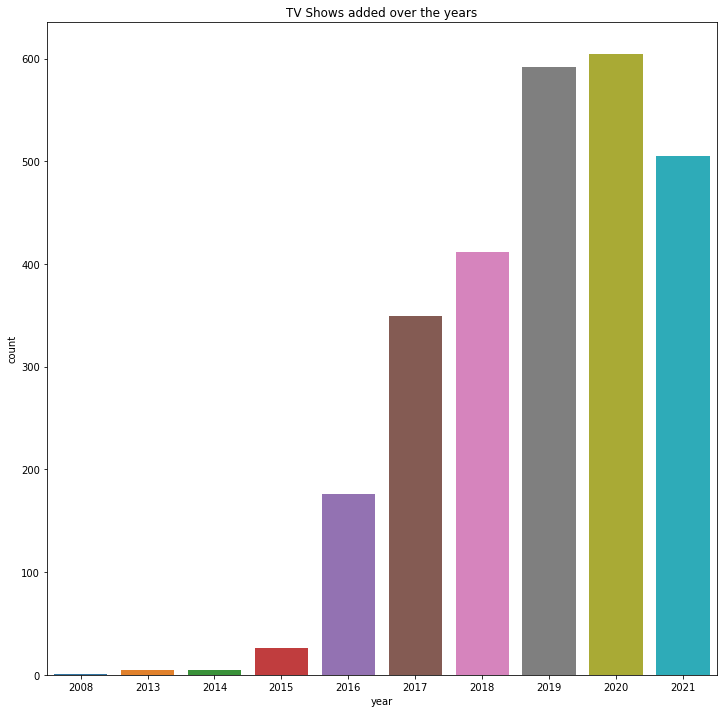

In [27]:
tvContent = df[df['type'] == 'TV Show']
plt.figure(figsize = (12,12))
a = sns.countplot(tvContent['year'])
plt.title('TV Shows added over the years')
plt.show()

In [28]:
col1 = df[df['rating_ages']=='74 min' ]
col2 = df[df['rating_ages']=='84 min' ]
col3 = df[df['rating_ages']=='66 min' ]
df.drop([5541,5794,5813], inplace=True)
df.shape

(8804, 15)

In [29]:
px.pie(df, names = 'rating_ages', values = df.index)

In [30]:
px.pie(movie,names="rating_ages", values=movie.index, title="Type of content present in movies")

In [32]:
px.pie(tv,names="rating_ages", values=tv.index, title="Type of content present in movies")

In [33]:
new = df[['type', 'year']].value_counts().reset_index()
new.columns = ['type', 'year', 'number']
px.line(data_frame = new, x = 'year', y ='number', color = 'type', line_group = 'type', range_x = [2005, 2025])